## In this coding discussion, we will walk you through some basic preprocessing techniques that will help you achieve some performance boost.

#### This notebook has been created by Tonmoy.

## (i) Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Flatten,Dropout
# from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Reshape
# from keras.utils import to_categorical
import matplotlib.pyplot as plt

## (ii)(a) Loading and visualizing the dataset 

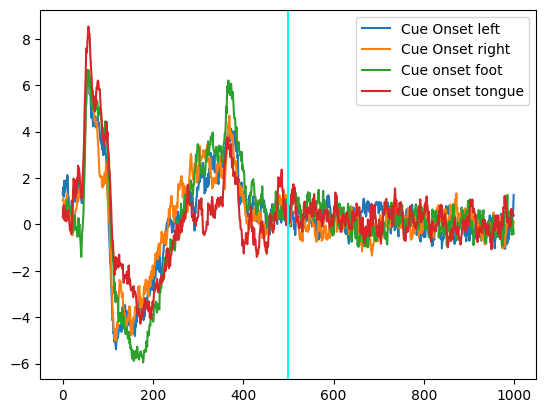

In [2]:
## Loading and visualizing the data

## Loading the dataset

path = "../project/"
X_test = np.load(path + "X_test.npy")
y_test = np.load(path + "y_test.npy")
person_train_valid = np.load(path + "person_train_valid.npy")
X_train_valid = np.load(path + "X_train_valid.npy")
y_train_valid = np.load(path + "y_train_valid.npy")
person_test = np.load(path + "person_test.npy")

## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769

## Visualizing the data

ch_data = X_train_valid[:,8,:] # extracts the 9th channel from the data


class_0_ind = np.where(y_train_valid == 0) # finds the indices where the label is 0
ch_data_class_0 = ch_data[class_0_ind] # finds the data where label is 0
avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0) # finds the average representation of the 9th channel when label is 0


class_1_ind = np.where(y_train_valid == 1)
ch_data_class_1 = ch_data[class_1_ind]
avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)

class_2_ind = np.where(y_train_valid == 2)
ch_data_class_2 = ch_data[class_2_ind]
avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)

class_3_ind = np.where(y_train_valid == 3)
ch_data_class_3 = ch_data[class_3_ind]
avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)


plt.plot(np.arange(1000),avg_ch_data_class_0)
plt.plot(np.arange(1000),avg_ch_data_class_1)
plt.plot(np.arange(1000),avg_ch_data_class_2)
plt.plot(np.arange(1000),avg_ch_data_class_3)
plt.axvline(x=500, label='line at t=500',c='cyan')

plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])





## (ii)(b) Preprocessing the dataset

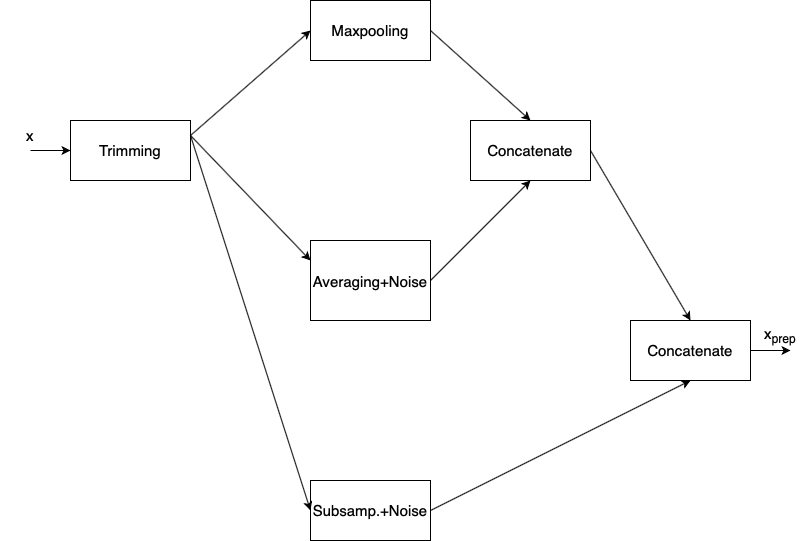

In [3]:
def data_prep(X,y,sub_sample,average,noise):
    
    total_X = None
    total_y = None
    
    # Trimming the data (sample,22,1000) -> (sample,22,500)
    X = X[:,:,0:500]
    print('Shape of X after trimming:',X.shape)
    
    # Maxpooling the data (sample,22,1000) -> (sample,22,500/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, sub_sample), axis=3)
    
    
    total_X = X_max
    total_y = y
    print('Shape of X after maxpooling:',total_X.shape)
    
    # Averaging + noise 
    X_average = np.mean(X.reshape(X.shape[0], X.shape[1], -1, average),axis=3)
    print(X_average.shape)
    X_average = X_average + np.random.normal(0.0, 0.5, X_average.shape)
    
    total_X = np.vstack((total_X, X_average))
    total_y = np.hstack((total_y, y))
    print('Shape of X after averaging+noise and concatenating:',total_X.shape)
    
    # Subsampling
    
    for i in range(sub_sample):
        
        X_subsample = X[:, :, i::sub_sample] + \
                            (np.random.normal(0.0, 0.5, X[:, :,i::sub_sample].shape) if noise else 0.0)
            
        total_X = np.vstack((total_X, X_subsample))
        total_y = np.hstack((total_y, y))
        
    
    print('Shape of X after subsampling and concatenating:',total_X.shape)
    return total_X,total_y


X_train_valid_prep,y_train_valid_prep = data_prep(X_train_valid,y_train_valid,2,2,True)


Shape of X after trimming: (2115, 22, 500)
Shape of X after maxpooling: (2115, 22, 250)
(2115, 22, 250)
Shape of X after averaging+noise and concatenating: (4230, 22, 250)
Shape of X after subsampling and concatenating: (8460, 22, 250)


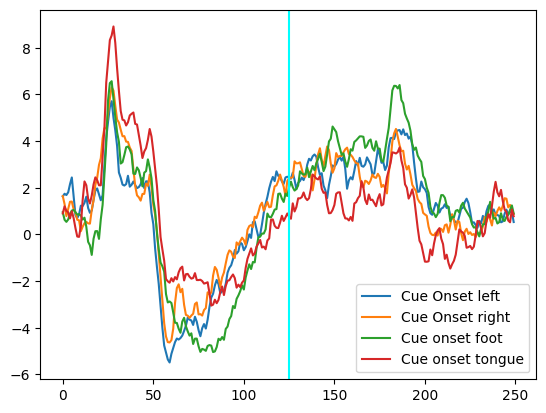

In [7]:

ch_data_prep = X_train_valid_prep[:,4,:] # extracts the 5th channel from the data


class_0_ind_prep = np.where(y_train_valid_prep == 0) # finds the indices where the label is 0
ch_data_class_0_prep = ch_data_prep[class_0_ind_prep] # finds the data where label is 0
avg_ch_data_class_0_prep = np.mean(ch_data_class_0_prep,axis=0) # finds the average representation of the 9th channel when label is 0


class_1_ind_prep = np.where(y_train_valid_prep == 1)
ch_data_class_1_prep = ch_data_prep[class_1_ind_prep]
avg_ch_data_class_1_prep = np.mean(ch_data_class_1_prep,axis=0)

class_2_ind_prep = np.where(y_train_valid_prep == 2)
ch_data_class_2_prep = ch_data_prep[class_2_ind_prep]
avg_ch_data_class_2_prep = np.mean(ch_data_class_2_prep,axis=0)

class_3_ind_prep = np.where(y_train_valid_prep == 3)
ch_data_class_3_prep = ch_data_prep[class_3_ind_prep]
avg_ch_data_class_3_prep = np.mean(ch_data_class_3_prep,axis=0)


plt.plot(np.arange(250),avg_ch_data_class_0_prep)
plt.plot(np.arange(250),avg_ch_data_class_1_prep)
plt.plot(np.arange(250),avg_ch_data_class_2_prep)
plt.plot(np.arange(250),avg_ch_data_class_3_prep)
plt.axvline(x=125, label='line at t=125',c='cyan')

plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])

In [8]:
print(X_train_valid_prep.shape)
print(y_train_valid_prep.shape)

(8460, 22, 250)
(8460,)


In [43]:
X_TSNE = X_train_valid_prep.reshape((X_train_valid_prep.shape[0], -1))

from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3, verbose=1, init='pca',perplexity=95, n_iter=300)

In [44]:
X_tsne = tsne.fit_transform(X_TSNE)

[t-SNE] Computing 286 nearest neighbors...
[t-SNE] Indexed 8460 samples in 0.051s...
[t-SNE] Computed neighbors for 8460 samples in 11.778s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8460
[t-SNE] Computed conditional probabilities for sample 2000 / 8460
[t-SNE] Computed conditional probabilities for sample 3000 / 8460
[t-SNE] Computed conditional probabilities for sample 4000 / 8460
[t-SNE] Computed conditional probabilities for sample 5000 / 8460
[t-SNE] Computed conditional probabilities for sample 6000 / 8460
[t-SNE] Computed conditional probabilities for sample 7000 / 8460
[t-SNE] Computed conditional probabilities for sample 8000 / 8460
[t-SNE] Computed conditional probabilities for sample 8460 / 8460
[t-SNE] Mean sigma: 383.257278
[t-SNE] KL divergence after 50 iterations with early exaggeration: 79.315094
[t-SNE] KL divergence after 300 iterations: 1.842353


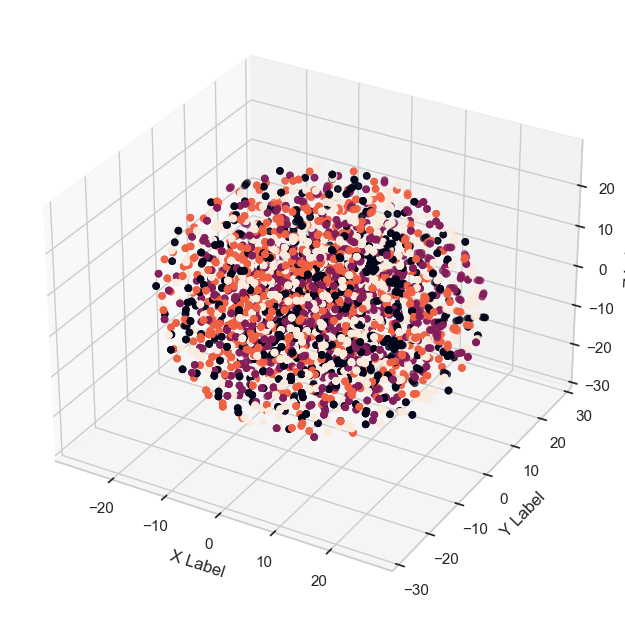

In [46]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], c=y_train_valid_prep, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


plt.show()

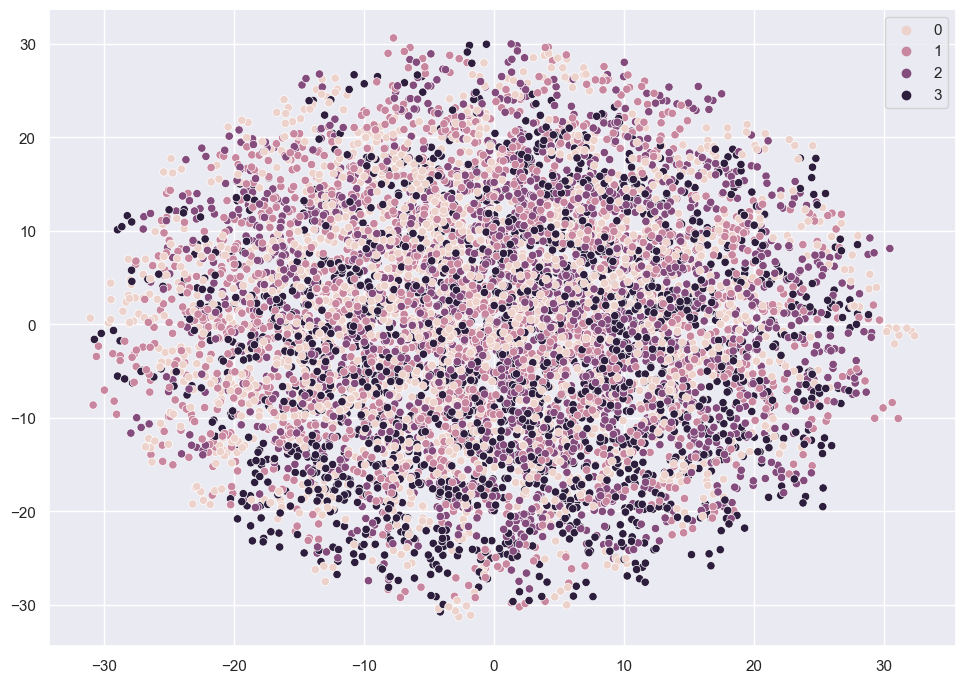

In [39]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_train_valid_prep)
plt.show() 

In [32]:
print(X_tsne.shape)

(8460, 3)


In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=22)
pca_result = pca.fit_transform(X_train_valid_prep)

print(pca.explained_variance_ratio_)

## (ii)(c) Preparing the training, validation, and test datasets

In [24]:
## Random splitting and reshaping the data
# First generating the training and validation indices using random splitting

ind_valid = np.random.choice(2115, 375, replace=False)
ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
(X_train, X_valid) = X_train_valid[ind_train], X_train_valid[ind_valid] 
(y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]


## Preprocessing the dataset
x_train,y_train = data_prep(X_train,y_train,2,2,True)
x_valid,y_valid = data_prep(X_valid,y_valid,2,2,True)
X_test_prep,y_test_prep = data_prep(X_test,y_test,2,2,True)


print('Shape of testing set:',X_test_prep.shape)
print('Shape of testing labels:',y_test_prep.shape)

print('Shape of training set:',x_train.shape)
print('Shape of validation set:',x_valid.shape)
print('Shape of training labels:',y_train.shape)
print('Shape of validation labels:',y_valid.shape)



# Converting the labels to categorical variables for multiclass classification
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test_prep, 4)
print('Shape of training labels after categorical conversion:',y_train.shape)
print('Shape of validation labels after categorical conversion:',y_valid.shape)
print('Shape of test labels after categorical conversion:',y_test.shape)

# Adding width of the segment to be 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)
print('Shape of training set after adding width info:',x_train.shape)
print('Shape of validation set after adding width info:',x_valid.shape)
print('Shape of test set after adding width info:',x_test.shape)


# Reshaping the training and validation dataset
x_train = np.swapaxes(x_train, 1,3)
x_train = np.swapaxes(x_train, 1,2)
x_valid = np.swapaxes(x_valid, 1,3)
x_valid = np.swapaxes(x_valid, 1,2)
x_test = np.swapaxes(x_test, 1,3)
x_test = np.swapaxes(x_test, 1,2)
print('Shape of training set after dimension reshaping:',x_train.shape)
print('Shape of validation set after dimension reshaping:',x_valid.shape)
print('Shape of test set after dimension reshaping:',x_test.shape)





    



(8460,) (443,)
Shape of X after trimming: (1740, 22, 500)
Shape of X after maxpooling: (1740, 22, 250)
Shape of X after averaging+noise and concatenating: (3480, 22, 250)
Shape of X after subsampling and concatenating: (6960, 22, 250)
Shape of X after trimming: (375, 22, 500)
Shape of X after maxpooling: (375, 22, 250)
Shape of X after averaging+noise and concatenating: (750, 22, 250)
Shape of X after subsampling and concatenating: (1500, 22, 250)
Shape of X after trimming: (443, 22, 500)
Shape of X after maxpooling: (443, 22, 250)
Shape of X after averaging+noise and concatenating: (886, 22, 250)
Shape of X after subsampling and concatenating: (1772, 22, 250)
Shape of testing set: (1772, 22, 250)
Shape of testing labels: (1772,)
Shape of training set: (6960, 22, 250)
Shape of validation set: (1500, 22, 250)
Shape of training labels: (6960,)
Shape of validation labels: (1500,)
Shape of training labels after categorical conversion: (6960, 4)
Shape of validation labels after categorical 

## (iii)(CNN) Defining the architecture of a basic CNN model

In [14]:
# Building the CNN model using sequential class
basic_cnn_model = Sequential()

# Conv. block 1
basic_cnn_model.add(Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu', input_shape=(250,1,22)))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same')) # Read the keras documentation
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 2
basic_cnn_model.add(Conv2D(filters=50, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 3
basic_cnn_model.add(Conv2D(filters=100, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 4
basic_cnn_model.add(Conv2D(filters=200, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Output layer with Softmax activation
basic_cnn_model.add(Flatten()) # Flattens the input
basic_cnn_model.add(Dense(4, activation='softmax')) # Output FC layer with softmax activation


# Printing the model summary
basic_cnn_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 250, 1, 25)        5525      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 84, 1, 25)        0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 84, 1, 25)        100       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 84, 1, 25)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 84, 1, 50)         12550     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 1, 50)       

## (iv)(CNN) Defining the hyperparameters of the basic CNN model

In [15]:
# Model parameters
learning_rate = 1e-3
epochs = 50
cnn_optimizer = keras.optimizers.Adam(lr=learning_rate)

## (v)(CNN) Compiling, training and validating the model

In [16]:
# Compiling the model
basic_cnn_model.compile(loss='categorical_crossentropy',
                 optimizer=cnn_optimizer,
                 metrics=['accuracy'])

# Training and validating the model
basic_cnn_model_results = basic_cnn_model.fit(x_train,
             y_train,
             batch_size=64,
             epochs=epochs,
             validation_data=(x_valid, y_valid), verbose=True)


Epoch 1/50
109/109 [==============================] - 10s 81ms/step - loss: 2.0110 - accuracy: 0.3243 - val_loss: 1.5183 - val_accuracy: 0.3213
Epoch 2/50
109/109 [==============================] - 8s 71ms/step - loss: 1.5167 - accuracy: 0.3858 - val_loss: 1.2930 - val_accuracy: 0.4213
Epoch 3/50
109/109 [==============================] - 9s 80ms/step - loss: 1.2959 - accuracy: 0.4546 - val_loss: 1.2622 - val_accuracy: 0.4227
Epoch 4/50
109/109 [==============================] - 8s 76ms/step - loss: 1.1694 - accuracy: 0.5068 - val_loss: 1.2076 - val_accuracy: 0.4760
Epoch 5/50
109/109 [==============================] - 7s 64ms/step - loss: 1.0970 - accuracy: 0.5389 - val_loss: 1.2054 - val_accuracy: 0.4773
Epoch 6/50
109/109 [==============================] - 7s 63ms/step - loss: 1.0330 - accuracy: 0.5716 - val_loss: 1.1025 - val_accuracy: 0.5180
Epoch 7/50
109/109 [==============================] - 7s 62ms/step - loss: 0.9731 - accuracy: 0.5987 - val_loss: 1.1084 - val_accuracy: 0.543

## (vi)(CNN) Visualizing the accuracy and loss trajectory

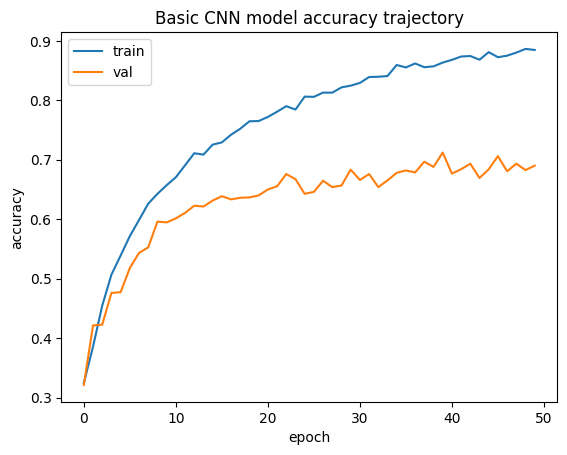

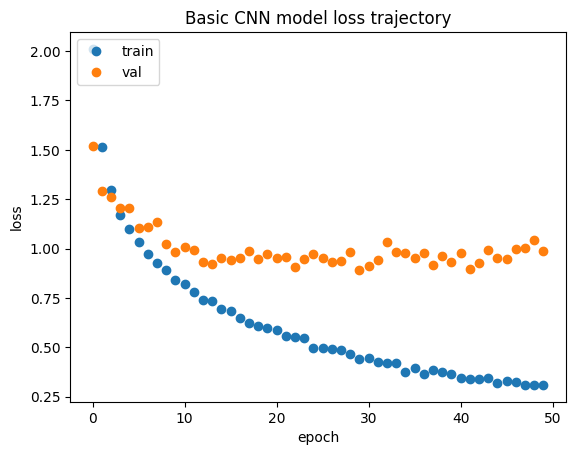

In [17]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(basic_cnn_model_results.history['accuracy'])
plt.plot(basic_cnn_model_results.history['val_accuracy'])
plt.title('Basic CNN model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(basic_cnn_model_results.history['loss'],'o')
plt.plot(basic_cnn_model_results.history['val_loss'],'o')
plt.title('Basic CNN model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## (vii)(CNN) Testing the performance of the basic CNN model on the held out test set

In [26]:
## Testing the basic CNN model

cnn_score = basic_cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the basic CNN model:',cnn_score[1])

Test accuracy of the basic CNN model: 0.7104966044425964
